# Effective Graph Paper
Code to generate "Figure 5 - Thaliana Perturbations"

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import cana
from cana.datasets.bio import THALIANA
import matplotlib.pyplot as plt

In [3]:
T = THALIANA()
corr_mat  = np.load("ThalianaPerturbationCorr.npy")

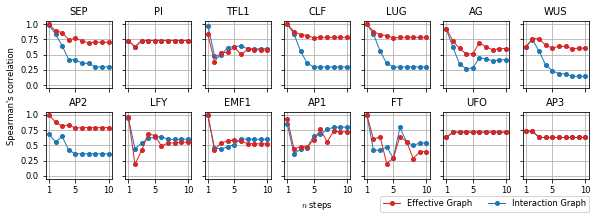

In [5]:
fig, axes = plt.subplots(2,7,figsize=(8.2,3), sharex=True, sharey=True)
axes = axes.flatten()
axesl = axes.tolist()
i = 0
for node in T.nodes:
    if node.name in ['FUL']:
        i += 1
        continue
    ax = axesl.pop()
    ys_eff = corr_mat[0,i,:]
    ys_int = corr_mat[1,i,:]
    xs = np.arange(1,len(ys_eff)+1,1)
    #ax.fill_between( np.arange(1,n_steps+1), corrmean-corrstd, corrmean+corrstd , color=colors[ip], alpha=0.2)                 
    ax.plot(xs, ys_eff, c='#d62728', label='Effective Graph',
            marker='o', ms=4, lw=1, ls='-', zorder=6)
    ax.plot(xs, ys_int, c='#1f77b4', label='Interaction Graph',
            marker='o', ms=4, lw=1, ls='-', zorder=5)
    
    ax.set_title(node.name, fontsize='medium')
    ax.set_xlim(0.5,10.5)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks([1,5,10])
    ax.set_xticklabels([1,5,10], fontsize='small')
    ax.set_yticks([0.0,0.25,0.5,0.75,1.0])
    ax.set_yticklabels([0.0,0.25,0.5,0.75,1.0], fontsize='small')
    ax.grid(zorder=1)
    #ax.set(adjustable=, aspect=10)
    i += 1

axes[7].set_ylabel("Spearman's correlation", ha='left', fontsize='small')
axes[10].set_xlabel(r'$n$ steps', fontsize='small')
plt.legend(loc='lower right', bbox_to_anchor=(1.07,-0.55), ncol=2, fontsize='small')

#plt.tight_layout()
plt.subplots_adjust(left=0.07, right=0.99, bottom=0.17, top=0.9, wspace=0.2, hspace=0.35)
plt.savefig("ThalianaPerturbations.pdf")
plt.show()